# Creating charts (& webpages!) with chartpy

By Saeed Amen (@saeedamenfx) - saeed@cuemacro.com

A great way to present a group of charts is via a webpage. How can we do this in a quick and easy way in Python? Furthemore, how can we change the plotting engine, from say bokeh to matplotlib and vice-versa, without totally rewriting our code? I've designed [chartpy]http://www.github.com/cuemacro/chartpy) to solve these problems and much more. chartpy has a common API for a number of underlying Python libraries, bokeh, plotly and matplotlib (I'm hoping to add more soon!) too. Furthermore, once charts are generated in this way, they can easily be grouped together into webpages, all within Python, without having to mess around with HTML or CSS.

As a first step let's add chartpy to our path (you don't have to do this, if you have installed it via pip).

In [1]:
import sys

try:
    sys.path.append('E:/Remote/chartpy')
except:
    pass

We need to download the data in order to plot. Let's use Quandl for this (although, I'd very much recommend using my library [findatapy](http://www.github.com/cuemacro/findatapy) which provides an easy way to download data from many data sources including Bloomberg, Quandl, FRED, Yahoo, Google etc. Let's also import all the classes we need from chartpy too

In [2]:
# support Quandl 3.x.x
try:
    import quandl as Quandl
except:
    # if import fails use Quandl 2.x.x
    import Quandl

from chartpy import Chart, Style, Canvas

# get your own free Quandl API key from https://www.quandl.com/ (i've used another class for this)
try:
    from chartpy.chartcred import ChartCred

    cred = ChartCred()
    quandl_api_key = cred.quandl_api_key
except:
    quandl_api_key = "x"

Let's download the data from Quandl for US Real GDP QoQ

In [3]:
df = Quandl.get(["FRED/A191RL1Q225SBEA"], authtoken=quandl_api_key)
df.columns = ["Real QoQ"]

We now create style objects, which give us the property setting for the charts. We can then create Chart objects with these styles. We just change the engine variable to switch from using bokeh to matplotlib etc. No need to use different calls for each plotting engine! We specify filenames for each plot (otherwise, the filename will be automatically created from the timestamp).

In [4]:
import copy

style = Style(title="US GDP", source="Quandl/Fred", scale_factor=-1, width=400, height=300, silent_display=True, thin_margin=True)
style_bokeh = copy.copy(style); style_bokeh.html_file_output = 's_bokeh.html'
style_plotly = copy.copy(style); style_plotly.html_file_output = 's_plotly.html'
style_matplotlib = copy.copy(style); style_matplotlib.file_output = 's_matplotlib.png'

# Chart object is initialised with the dataframe and our chart style
chart_bokeh = Chart(df=df, chart_type='line', engine='bokeh', style=style_bokeh)
chart_plotly = Chart(df=df, chart_type='line', engine='plotly', style=style_plotly)
chart_matplotlib = Chart(df=df, chart_type='line', engine='matplotlib', style=style_matplotlib)

We can if we choose plot individual charts like this (we need the inline statement for matplotlib to plot in the Jupyter notebook), using the following syntax.

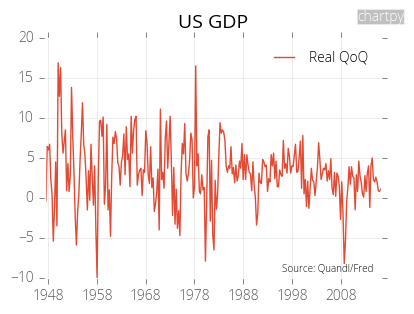

In [5]:
%matplotlib inline
chart_matplotlib.plot()

# Creating a Canvas for a webpage

We now create a canvas object, combining our various chart objects. We can also include text or pandas dataframes (which will be printed as tables. We we use the 'plain' canvas plotter, which has minimal formatting. We need a flag for Jupyter notebook, so it will link the final HTML file inside this notebook. If we turn silent_display to False, it would also open the HTML file in a web browser.

In [6]:
text = "A demo of chartpy canvas!!"

# using plain template
canvas = Canvas([[text, chart_bokeh], [chart_plotly, df.tail(n=5)]])

canvas.generate_canvas(jupyter_notebook=True, silent_display=True, canvas_plotter='plain', output_filename='s_canvas_plain.html')

We create another canvas object and then use the Keen IO based template, which looks a bit neater.

In [7]:
# using the Keen template (needs static folder in the same place as final HTML file)
canvas = Canvas([[chart_bokeh, chart_plotly], [chart_plotly, chart_matplotlib]])

canvas.generate_canvas(jupyter_notebook=True, silent_display=True, canvas_plotter='keen', output_filename = 's_canvas_keen.html')

At this stage, the webpage functionality is fairly limited, however, we are planning to expand the Canvas object, so you will be able to specify many other properties. My main priority though is to make it quick and easy to call! 

If you are interested in using chartpy you can download it from http://www.github.com/cuemacro/chartpy - and as ever contributors are always welcome for this open source project! If you have any questions about the library feel free to contact me on saeed@cuemacro.com